# Part 1

In [53]:
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv("extended_salary_data.csv")
df.head(5)

,YearsExperience,Salary
0,8.1,77884.67
1,19.1,127213.68
2,14.9,103343.52
3,12.4,88988.96
4,4.0,35214.78


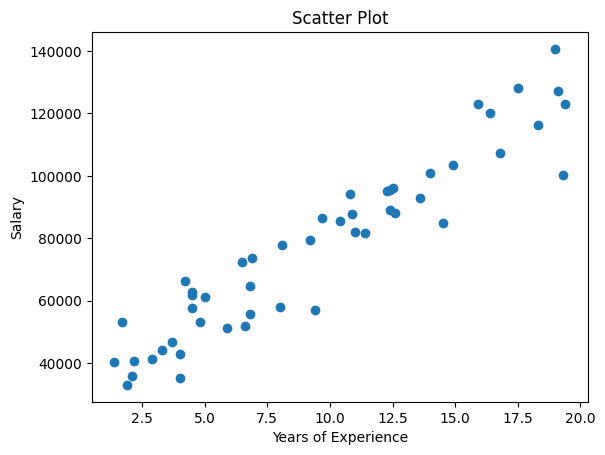

In [55]:
plt.scatter(x = df["YearsExperience"] , y = df["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Scatter Plot")
plt.show()

In [56]:
df.describe()

,YearsExperience,Salary
count,50.000000,50.00000
mean,9.480000,77370.54740
std,5.485491,28298.92442
min,1.400000,33048.80000
25%,4.500000,53861.88000
50%,9.300000,78598.65000
75%,13.350000,95356.22500
max,19.400000,140646.44000


In [57]:
variance_salary = np.var(df['Salary'])
variance_exp = np.var(df['YearsExperience'])

In [58]:
print(f"Variance\nSalary : {variance_salary}\nYears of Experience: {variance_exp}")

Variance
Salary : 784812540.8713832
Years of Experience: 29.4888


In [59]:
X = df['YearsExperience'].to_frame()
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 5)

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9089957622130421

In [61]:
print(f'The coefficient is {lr.coef_} and intercept is {lr.intercept_}')

The coefficient is [4931.18389219] and intercept is 30582.805179466515


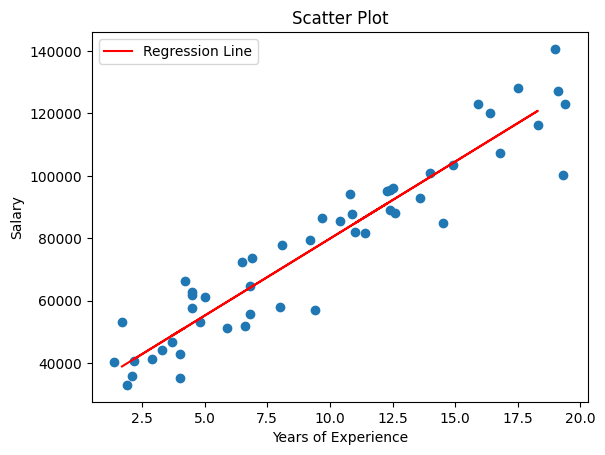

In [62]:
plt.scatter(x = df["YearsExperience"] , y = df["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Scatter Plot")
y_pred = lr.predict(X_test)
plt.plot(X_test, y_pred, c = 'r', label = 'Regression Line')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error : {mae} \nMean Squared Error : {mse}')

Mean Absolute Error : 6445.643704570218 
Mean Squared Error : 67938512.16416353


# Bonus Task

In [64]:
df.head(7)


,YearsExperience,Salary
0,8.1,77884.67
1,19.1,127213.68
2,14.9,103343.52
3,12.4,88988.96
4,4.0,35214.78
5,4.0,42801.56
6,2.1,35893.61


In [65]:
noise = np.random.uniform( -3,3 , size= (50))
noise

array([ 2.60100322, -2.71829396,  2.80272432,  2.70473907, -1.28685231,
        1.18825955,  1.327219  , -0.07060587,  1.18900749, -2.57886039,
        1.03010352,  1.11669018, -0.91371873,  0.13410143,  2.34196242,
       -2.66230939, -0.11336168, -1.47331264,  2.77834264, -1.22629448,
       -2.56850065,  1.34028046,  0.46676872,  1.37033068,  1.97325412,
       -2.30551976, -1.39226205,  1.2295252 ,  0.59894306, -0.89118485,
       -2.05384023,  1.273362  ,  1.7046358 ,  0.09991069,  1.61254342,
       -2.24879581, -0.49966946, -2.72025313,  0.65652484, -2.72634044,
        0.99895984, -1.98189234,  0.02437734, -0.6853606 , -0.02781597,
       -2.39410321,  1.50262208, -2.80246578, -0.17355444, -2.96637777])

Adding a NumProjects variable which is correlated with both salary and years experience but also added some noise to distort the data a bit

In [66]:
NumProjectsCompleted = np.ceil(1.2*df['YearsExperience'] + 10*(df['Salary']/max(df['Salary'])) + noise)
NumProjectsCompleted.head()


0    18.0
1    30.0
2    29.0
3    24.0
4     7.0
dtype: float64

In [67]:
df['NumProjectsCompleted'] = NumProjectsCompleted.to_list()
df

,YearsExperience,Salary,NumProjectsCompleted
0,8.1,77884.67,18.0
1,19.1,127213.68,30.0
2,14.9,103343.52,29.0
3,12.4,88988.96,24.0
4,4.0,35214.78,7.0
5,4.0,42801.56,10.0
6,2.1,35893.61,7.0
7,17.5,128071.22,31.0
8,12.4,95436.18,23.0
9,14.5,84869.60,21.0


In [68]:
X1 = df[['NumProjectsCompleted' , 'YearsExperience' ]]
y1 = df['Salary']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1 , train_size= 0.75, random_state= 12)

In [69]:
lr.fit(X1_train , y1_train)
lr.score(X1_test , y1_test)

0.9563997881407424

In [70]:
y1_pred = lr.predict(X1_test)
mae1 = mean_absolute_error(y1_test, y1_pred)
mse1 = mean_squared_error(y1_test, y1_pred)

In [71]:
print("Model Coefficients (Slopes):", lr.coef_)
print("Intercept :", lr.intercept_)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

Model Coefficients (Slopes): [1763.60389011 2208.03455707]
Intercept : 25406.704876133037
Mean Absolute Error (MAE): 6445.643704570218
Mean Squared Error (MSE): 67938512.16416353


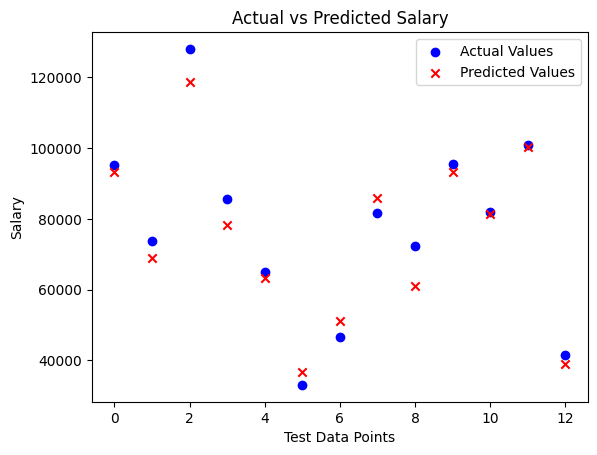

In [72]:

plt.scatter(range(len(y1_test)), y1_test, color='b', label='Actual Values')
plt.scatter(range(len(y1_pred)), y1_pred, color='r', label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Test Data Points')
plt.ylabel('Salary')
plt.legend()
plt.show()
